In [1]:
# GHOST - Advection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 3

# geometry mapping degree (isoparametric)
p_geo = p

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_x_5y_5.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2), p_geo=p_geo)

# volume and facet collocation degrees
p_omega = p
p_gamma = p

theta = np.pi/4
a = np.sqrt(2)

# solver parameters
params1 = {"project_title": "adv_test_2d_1",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.ones(2),
         "wave_speed": a*np.array([np.sin(theta),np.cos(theta)]),
         "upwind_parameter": 1.0,
         "integration_type": "collocation",
         "solution_degree": p,
         "volume_collocation_degree": p,
         "facet_collocation_degree": p,
         "solution_representation": "nodal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver1 = Solver(params1,mesh)
params2 = {"project_title": "adv_test_2d_2",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.ones(2),
         "wave_speed": a*np.array([np.sin(theta),np.cos(theta)]),
         "upwind_parameter": 1.0,
         "integration_type": "collocation",
         "solution_degree": p,
         "volume_collocation_degree": 2*p,
         "facet_collocation_degree": 2*p,
         "solution_representation": "nodal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver2 = Solver(params2,mesh)

In [2]:
uhat_0 = solver1.project_function(solver1.u_0)
solver1.R(uhat_0,0.0)[0]

array([[ 0.10474133, -4.73517036, -7.10480694, -7.18178032, -6.10038649,
        -4.20061066, -2.78519535,  0.88053666,  6.15062326, 13.54707336]])

In [3]:
solver2.R(uhat_0,0.0)[0]

array([[ 0.97599165, -4.46209936, -7.72466976, -7.83637104, -5.64458172,
        -4.23549814, -2.3249694 ,  0.46031981,  6.15730774, 12.00560582]])

dt =  0.0017825311942959


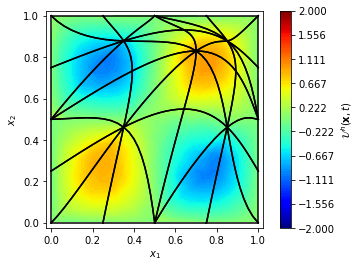

In [4]:
solver1.run()
solver1.post_process()
solver1.plot(plot_numerical=True, plot_exact=False,
            plot_curves=True, plot_nodes=False, 
            u_range=[-2,2])

dt =  0.0017825311942959


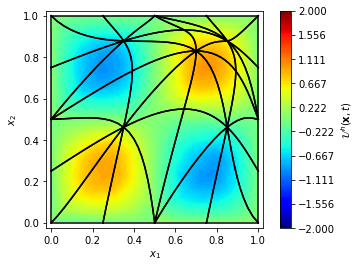

In [5]:
solver2.run()
solver2.post_process()
solver2.plot(plot_numerical=True, plot_exact=False,
            plot_curves=True, plot_nodes=False, 
            u_range=[-2,2])

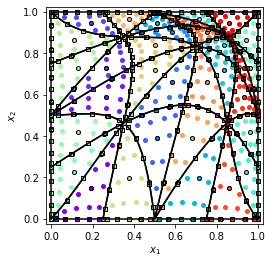

In [6]:
solver2.discretization.plot(plot_geometry_nodes=True, filename="../plots/collocation_p3.pdf")

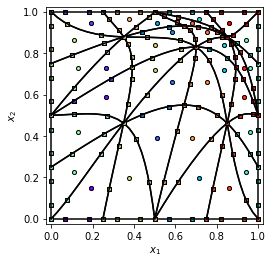

In [7]:
solver1.discretization.plot(plot_geometry_nodes=True, filename="../plots/lumped_collocation_p3.pdf")